In [3]:
import cv2  as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


2023-09-24 22:48:13.379979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 22:48:13.904801: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 22:48:13.909970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 22:48:18.526566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


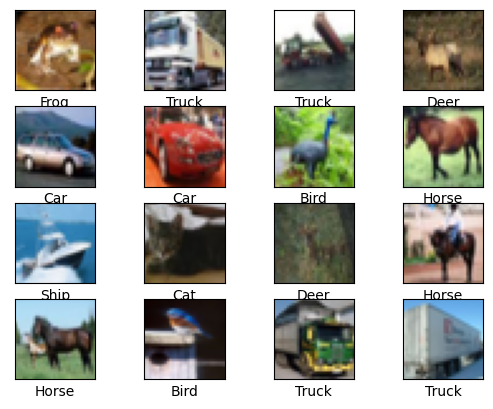

In [6]:
(training_images,training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data()

training_images,testing_images = training_images/255,testing_images/255

class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])


plt.show()

In [6]:
training_images = training_images[:5000]
training_labels = training_labels[:5000]
testing_images = testing_images[:2000]
testing_labels = testing_labels[:2000]

In [7]:
# model = models.Sequential()
# model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64,activation='relu'))
# model.add(layers.Dense(10,activation='softmax'))

In [8]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(training_images,training_labels,epochs=10, validation_data=(testing_images,testing_labels))

# loss, accuracy = model.evaluate(testing_images,testing_labels)
# print(f"loss: {loss}")
# print(f"Accuracy: {accuracy}")

# model.save('image_classifier.model')


1/1 [==============================] - 0s 280ms/step
prediction is Car


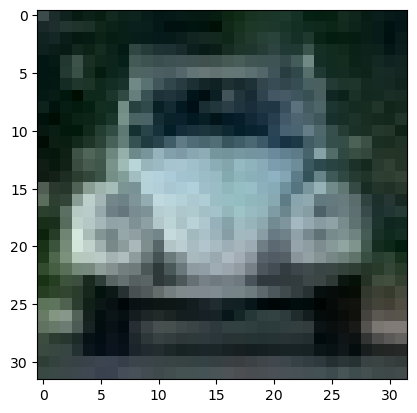

In [9]:
model  = models.load_model('image_classifier.model')

img = cv.imread('car.jpg')  # input image

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)


prediction = model.predict(np.array([img])/ 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')